## Social Network Ads_Classification

I will use the "Social_Network_Ads" dataset for this exercise. 
The dataset is on social network ads and users' click-through. 

Goal: The aim of this project is to build a model to predict if a new user will click on and the most important variable to consider to predict whether a used will click on the ad.

##Data preparation


In [3]:
#loading the 50_startups datasets as a panda dataframe
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Clicked
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Clicked
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
# number of users who Clicked on the ad
df['Clicked'].sum()

143

## Data Visualization

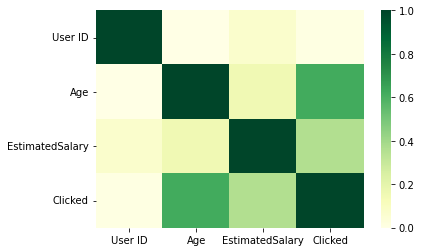

In [8]:
# visually exploring the data: correlation matrix of the dataset
import seaborn as sb
cormatrix=df.corr()
sb.heatmap(cormatrix,cmap='YlGn') 
#cmap(colormap) options: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

### Dependent and Independent varialble

In [9]:
##preparing the data for model training
y = df[['Clicked']]  
X = df[['Age','EstimatedSalary']] 

In [11]:
#X    
y

,Clicked
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


None of the potential predictor/input/X variables are categorical, so no need to encode them (i.e., dummy or OneHot encoding). 

In [14]:
X.head(5)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [15]:
y.head(5)

,Clicked
0,0
1,0
2,0
3,0
4,0


## Splitting the data into Train/Test set
splitting the data intro train and test set, try several classifications models, and evaluate their predicitve performance:

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#splitting the dataset into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


### Scaling the Dataset

In [18]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#sc = StandardScaler() #standardization scaler   
sc = MinMaxScaler() #minmax scaling scaler
X_train_sc=sc.fit_transform(X_train)

### Comparing original dataset with scaled data

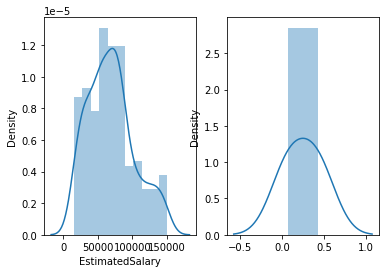

In [19]:

# Let's compare the histograms of pre/post scaling for one variable ("mean radius") in our training data (X_train)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sb.distplot(X_train[X_train.columns[1]], ax=axs[0])
sb.distplot(X_train_sc[[1]], ax=axs[1])

### Logistic Regression Model

In [20]:
#using logistic regression 
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression(random_state = 0, solver='liblinear')
logistic1.fit(X_train_sc, y_train) #fitting the model

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
#using the trained model to predict outcome values for the test data (X_test)
y_pred = logistic1.predict(sc.transform(X_test))
y_pred     #visualize the predictions

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

##Model Evaluation
Using sklearn.metrics to calculate performance metrics

NB: Another option is scikitplot (which runs on top of sklearn) to create more appealing display for evaluation metrics such as the confusion matrix and various model evaluation plots.

In [32]:
!pip install sklearn
!pip install sklearn scikit-plot  #run once to install library

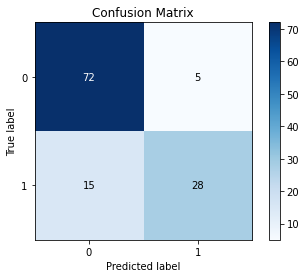

In [33]:
#!pip install scikit-plot #run once to install library
#using scikit plot for model evaluation
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #confusion matrix

In [38]:
#the model's Precision, Recall, and Accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

(precision_score(y_test, y_pred), #Precision
recall_score(y_test, y_pred), #Recall
accuracy_score(y_test, y_pred)) #Accuracy
#skplt.metrics.balanced_accuracy_score(y_test, y_pred)) #Balanced Accuracy

(0.8484848484848485, 0.6511627906976745, 0.8333333333333334)

In [39]:
#calculating the probabilty of each observation in X-test to belong to either outcome class; Benign=0 , Malignant=1
y_pred_prob=logistic1.predict_proba(sc.fit_transform(X_test))
y_pred_prob

array([[0.48882732, 0.51117268],
       [0.57878045, 0.42121955],
       [0.63850289, 0.36149711],
       [0.89707993, 0.10292007],
       [0.66521983, 0.33478017],
       [0.71505237, 0.28494763],
       [0.86948275, 0.13051725],
       [0.18999827, 0.81000173],
       [0.5110202 , 0.4889798 ],
       [0.66678084, 0.33321916],
       [0.80678818, 0.19321182],
       [0.57057738, 0.42942262],
       [0.39790956, 0.60209044],
       [0.88227624, 0.11772376],
       [0.77985497, 0.22014503],
       [0.28426427, 0.71573573],
       [0.857178  , 0.142822  ],
       [0.78324083, 0.21675917],
       [0.80295484, 0.19704516],
       [0.72846901, 0.27153099],
       [0.83969609, 0.16030391],
       [0.69707335, 0.30292665],
       [0.9330459 , 0.0669541 ],
       [0.74323301, 0.25676699],
       [0.79476857, 0.20523143],
       [0.59820999, 0.40179001],
       [0.88991086, 0.11008914],
       [0.11627382, 0.88372618],
       [0.68568145, 0.31431855],
       [0.53263811, 0.46736189],
       [0.

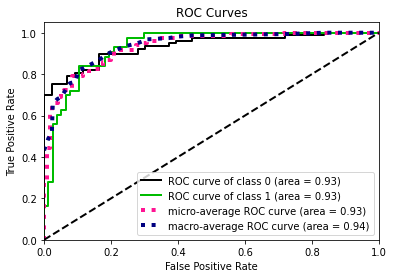

In [40]:
#plotting the ROC curve to evalute the model's aggregate performance
skplt.metrics.plot_roc_curve(y_test,y_pred_prob)


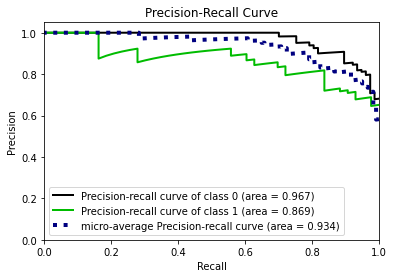

In [41]:
# plotting the precision-recall curve
skplt.metrics.plot_precision_recall_curve(y_test,y_pred_prob)

##Decision Tree Classification Model

In [42]:
#using the Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
DecTree1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 123) #change metric to 'gini' and rerun
DecTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

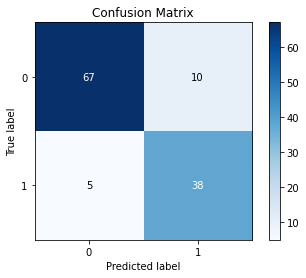

In [43]:
#using the model to predict outcomes for X_test
y_pred = DecTree1.predict(X_test) 
#confusion matrix for the DecTree Classifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### Model Accuracy

In [44]:
#calculating other model evalution metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

(precision_score(y_test, y_pred), #Precision
recall_score(y_test, y_pred), #Recall
accuracy_score(y_test, y_pred)) #Accuracy

(0.7916666666666666, 0.8837209302325582, 0.875)

## Cross validation 
Is an approach to evalute machine learning models. CV helps with **overfitting** in supervised learning. It is also use to for model selection (selecting the best performing model between several candidates).


##Comparing several models (using CV for model validation)
Next, I will put everything together and compare several models based on several performance metrics. k-fold cross-validation is used to evaluate each model. 

LogisticReg: 0.642500 (0.068966)
K-NN      : 0.797500 (0.078621)
DecisTree: 0.865000 (0.060415)
NaiveBayes: 0.887500 (0.059424)
SVM       : 0.770000 (0.062048)
RandForest: 0.890000 (0.062450)


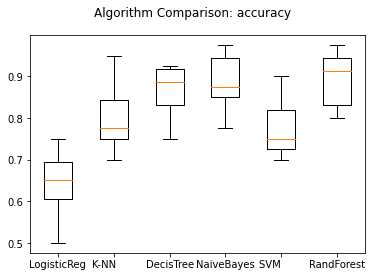

In [48]:
import warnings
warnings.filterwarnings('ignore')
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LogisticReg', LogisticRegression(max_iter=500)))
models.append(('K-NN      ', KNeighborsClassifier()))
models.append(('DecisTree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('SVM       ', SVC())) # add a SVM classifieer
# the next line adds a RandomForest classifier
models.append(('RandForest', RandomForestClassifier(n_estimators = 10,criterion = 'entropy')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' #metric we want to compare.  can be 1.precision 2.recall or 3.accuracy
#see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for complete list of options
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: ' +scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Clicked'], dtype='object')

### Observation
RandomForest has the best Accuracy with an average score of 89%

## Interactive Visualization of Decision Tree Classifers

In [49]:
!pip install ipywidgets

In [51]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# class labels
labels = X.columns #
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0, criterion = crit, 
                                     splitter = split, max_depth = depth,
                                     min_samples_split=min_split, 
                                     min_samples_leaf=min_leaf)
  estimator.fit(X, y)
  graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                      feature_names=labels, 
                                      class_names=['0', '1', '2'], filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator

inter=interactive(plot_tree, 
                  crit = ["gini", "entropy"] , 
                  split = ["best", "random"] , 
                  depth=[1,2,3,4], 
                  min_split=(0.1,1), #min number of samples to further split a node
                  min_leaf=(0.1,0.5)) #min number of samples required to be a leaf node
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Observation
From the above tree, the most important variable to consider to predict whether a user will click on the ad is the 'Age' of the user.